In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('Amazone_fine_food_review.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      9998 non-null   int64 
 1   ProductId               9998 non-null   object
 2   UserId                  9998 non-null   object
 3   ProfileName             9998 non-null   object
 4   HelpfulnessNumerator    9998 non-null   int64 
 5   HelpfulnessDenominator  9998 non-null   int64 
 6   Score                   9998 non-null   int64 
 7   Time                    9998 non-null   int64 
 8   Summary                 9998 non-null   object
 9   Text                    9998 non-null   object
dtypes: int64(5), object(5)
memory usage: 781.2+ KB


In [4]:
data.describe(include='all')

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
count,9998.00000,9998,9998,9998,9998.000000,9998.000000,9998.000000,9.998000e+03,9998,9998
unique,NaN,1422,9013,8677,NaN,NaN,NaN,NaN,8524,9511
top,NaN,B003VXFK44,A1Z54EM24Y40LL,c2,NaN,NaN,NaN,NaN,Delicious,"First, let me say that I prefer extra-bold K-C..."
freq,NaN,455,17,17,NaN,NaN,NaN,NaN,43,6
mean,4999.50000,NaN,NaN,NaN,1.573715,2.015003,4.134427,1.294364e+09,NaN,NaN
std,2886.31833,NaN,NaN,NaN,5.231131,5.808123,1.327276,4.769118e+07,NaN,NaN
min,1.00000,NaN,NaN,NaN,0.000000,0.000000,1.000000,9.617184e+08,NaN,NaN
25%,2500.25000,NaN,NaN,NaN,0.000000,0.000000,4.000000,1.268784e+09,NaN,NaN
50%,4999.50000,NaN,NaN,NaN,0.000000,1.000000,5.000000,1.307837e+09,NaN,NaN
75%,7498.75000,NaN,NaN,NaN,2.000000,2.000000,5.000000,1.329955e+09,NaN,NaN


In [5]:
ratings = data["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

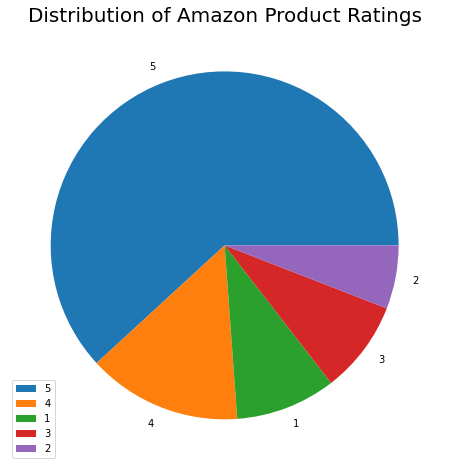

In [6]:
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers)
plt.legend()
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

In [7]:
data.shape

(9998, 10)

In [8]:
# library to clean data
import re

# Natural Language Tool Kit
import nltk

nltk.download('stopwords')

# to remove stopword
from nltk.corpus import stopwords

# for Stemming propose
from nltk.stem.porter import PorterStemmer

# Initialize empty array
# to append clean text
corpus = []

# 1000 (reviews) rows to clean
for i in range(0, 9998):
	
	# column : "Review", row ith
	review = re.sub('[^a-zA-Z]', ' ', data['Text'][i])
	
	# convert all cases to lower cases
	review = review.lower()
	
	# split to array(default delimiter is " ")
	review = review.split()
	
	# creating PorterStemmer object to
	# take main stem of each word
	ps = PorterStemmer()
	
	# loop for stemming each word
	# in string array at ith row
	review = [ps.stem(word) for word in review
				if not word in set(stopwords.words('english'))]
				
	# rejoin all string array elements
	# to create back into a string
	review = ' '.join(review)
	
	# append each string to create
	# array of clean text
	corpus.append(review)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
print(corpus)

['bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better', 'product arriv label jumbo salt peanut peanut actual small size unsalt sure error vendor intend repres product jumbo', 'confect around centuri light pillowi citru gelatin nut case filbert cut tini squar liber coat powder sugar tini mouth heaven chewi flavor highli recommend yummi treat familiar stori c lewi lion witch wardrob treat seduc edmund sell brother sister witch', 'look secret ingredi robitussin believ found got addit root beer extract order good made cherri soda flavor medicin', 'great taffi great price wide assort yummi taffi deliveri quick taffi lover deal', 'got wild hair taffi order five pound bag taffi enjoy mani flavor watermelon root beer melon peppermint grape etc complaint bit much red black licoric flavor piec particular favorit kid husband last two week would recommend brand taffi delight treat', 'saltwat taffi great

In [10]:
Clean_Text=pd.DataFrame(corpus)

In [11]:
data1=data.drop(['Id', 'ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'], axis = 1)

In [12]:
data1['clean_text']=pd.DataFrame(corpus)
data1.head()

,Score,Text,clean_text
0,5,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanut peanut a...
2,4,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...
3,2,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...
4,5,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...


In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [14]:
sentiments = SentimentIntensityAnalyzer()
data1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data1["clean_text"]]
data1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data1["clean_text"]]
data1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data1["clean_text"]]
data1.head()

,Score,Text,clean_text,Positive,Negative,Neutral
0,5,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...,0.427,0.000,0.573
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanut peanut a...,0.110,0.129,0.762
2,4,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...,0.223,0.141,0.636
3,2,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...,0.146,0.000,0.854
4,5,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...,0.545,0.000,0.455


In [15]:
x = sum(data1["Positive"])
y = sum(data1["Negative"])
z = sum(data1["Neutral"])
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  2729.6070000000045
Negative:  435.15399999999886
Neutral:  6833.268000000007


In [16]:
def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
sentiment_score(x, y, z)

Neutral


In [17]:
data1["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in data1["clean_text"]]
data1.head()

,Score,Text,clean_text,Positive,Negative,Neutral,Compound
0,5,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...,0.427,0.000,0.573,0.9081
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanut peanut a...,0.110,0.129,0.762,-0.1027
2,4,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...,0.223,0.141,0.636,0.6249
3,2,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...,0.146,0.000,0.854,0.4404
4,5,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...,0.545,0.000,0.455,0.9186


In [18]:
Results=[]
for i in data1['Compound']:
    if i>=0.5:
        Result= 'Positive'
        Results.append(Result)
    elif i<=-0.5:
        Result= 'Negative'
        Results.append(Result)
    else:
        Result= 'Neutral'
        Results.append(Result)
   

In [19]:
data1['Sentiment']=pd.DataFrame(Results)
data1.head()

,Score,Text,clean_text,Positive,Negative,Neutral,Compound,Sentiment
0,5,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...,0.427,0.000,0.573,0.9081,Positive
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanut peanut a...,0.110,0.129,0.762,-0.1027,Neutral
2,4,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...,0.223,0.141,0.636,0.6249,Positive
3,2,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...,0.146,0.000,0.854,0.4404,Neutral
4,5,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...,0.545,0.000,0.455,0.9186,Positive
